In [31]:
# this code needs to be run once to install the packages on your system
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("fastDummies")
install.packages("dplyr")
install.packages("car")
update.packages(ask = FALSE)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
# this code needs to be run to open the packages

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers

options(scipen = 999)

update.packages("tidyverse")
update.packages("ggplot2")
update.packages("fastDummies")
update.packages("dplyr")
update.packages("car")


# Purpose of this worksheet
---

### In this worksheet you will start by using R versions of operations you have already used in Python.  Then you will be analysing student performance data and performing a multiple linear regression. ###

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/exams.csv"



## Exercise 1
---

Read the data into a variable and have a look at it.

In [53]:

library(tidyverse)

# Set the URL of the dataset
url <- "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/exams.csv"

# Read the data from the URL with specified column types
data <- read_csv(url, col_types = cols(
  gender = col_character(),
  ethnicity = col_character(),
  parental_education = col_character(),
  lunch = col_character(),
  preparation_course = col_character(),
  math_score = col_double(),
  reading_score = col_double(),
  writing_score = col_double()
))

# Convert categorical variables to factors
data <- data %>%
  mutate(
    gender = as.factor(gender),
    ethnicity = as.factor(ethnicity),
    parental_education = as.factor(parental_education),
    lunch = as.factor(lunch),
    preparation_course = as.factor(preparation_course)
  )

# Display the first few rows of the dataset
print(head(data))

# Display a summary of the dataset
print(summary(data))

# Fit a multiple linear regression model
# Predicting math_score based on reading_score, writing_score, and other categorical variables
model <- lm(math_score ~ reading_score + writing_score + gender + ethnicity + parental_education + lunch + preparation_course, data = data)

# View the summary of the model
print(summary(model))



# A tibble: 6 × 8
  gender ethnicity parental_education lunch        preparation_course math_score
  <fct>  <fct>     <fct>              <fct>        <fct>                   <dbl>
1 female group E   some college       free/reduced none                       65
2 male   group C   some college       standard     completed                  75
3 female group B   some high school   free/reduced completed                  62
4 male   group D   some high school   standard     completed                  60
5 female group C   high school        free/reduced completed                  34
6 female group B   some college       free/reduced none                       53
# ℹ 2 more variables: reading_score <dbl>, writing_score <dbl>
    gender      ethnicity            parental_education          lunch    
 female:496   group A: 82   associate's degree:190      free/reduced:353  
 male  :504   group B:197   bachelor's degree :110      standard    :647  
              group C:313   high school       

# Lets have a look at the data ###

We can use the `arrange()` function to sort the data or `desc()` function to sort into descending order



### Exercise 2 ###
---

Now have a go looking at the data in different ways, using the functions above:

In [62]:
# Load the necessary library
library(tidyverse)

# Set the URL of the dataset
url <- "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/exams.csv"

# Read the data from the URL and suppress the column specification message
data <- read_csv(url, show_col_types = FALSE)

# Convert categorical variables to factors for better analysis
data <- data %>%
  mutate(
    gender = as.factor(gender),
    ethnicity = as.factor(ethnicity),
    parental_education = as.factor(parental_education),
    lunch = as.factor(lunch),
    preparation_course = as.factor(preparation_course)
  )

# 1. Arrange the data by math_score in ascending order
arranged_math_score <- arrange(data, math_score)

# Display the first few rows of the arranged data
cat("\nFirst few rows sorted by math_score in ascending order:\n")
print(head(arranged_math_score, n = 10))  # Showing the first 10 rows

# Display the last few rows of the arranged data
cat("\nLast few rows sorted by math_score in ascending order:\n")
print(tail(arranged_math_score, n = 10))  # Showing the last 10 rows

# Summary statistics of the arranged data
cat("\nSummary of data sorted by math_score:\n")
print(summary(arranged_math_score))

# 2. Arrange the data by reading_score in descending order
arranged_reading_score_desc <- arrange(data, desc(reading_score))

# Display the first few rows of the arranged data
cat("\nFirst few rows sorted by reading_score in descending order:\n")
print(head(arranged_reading_score_desc, n = 10))  # Showing the first 10 rows

# 3. Select specific columns to view
selected_columns <- select(data, gender, math_score, reading_score, writing_score)

# Display the first few rows of the selected columns
cat("\nSelected columns (gender, math_score, reading_score, writing_score):\n")
print(head(selected_columns, n = 10))  # Showing the first 10 rows



First few rows sorted by math_score in ascending order:
# A tibble: 10 × 8
   gender ethnicity parental_education lunch       preparation_course math_score
   <fct>  <fct>     <fct>              <fct>       <fct>                   <dbl>
 1 male   group C   high school        free/reduc… none                       13
 2 female group D   high school        standard    none                       18
 3 male   group C   high school        free/reduc… none                       21
 4 male   group A   some high school   free/reduc… none                       23
 5 female group C   master's degree    free/reduc… none                       27
 6 female group B   associate's degree standard    completed                  28
 7 male   group C   some high school   free/reduc… none                       29
 8 male   group C   some high school   free/reduc… none                       30
 9 male   group D   high school        free/reduc… none                       31
10 female group D   associate's d

# Prepare the data for a linear regression

Rows containing null, or error-prone values can affect statistics such as measures of central tendency (e.g. mean, median) and operations such as linear regressions, reducing accuracy.


### Exercise 3
---

Check your dataframe for null values and remove rows with null values if necessary

In [63]:
# Load the necessary library
library(tidyverse)

# Set the URL of the dataset
url <- "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/exams.csv"

# Read the data from the URL and suppress the column specification message
data <- read_csv(url, show_col_types = FALSE)

# Convert categorical variables to factors for better analysis
data <- data %>%
  mutate(
    gender = as.factor(gender),
    ethnicity = as.factor(ethnicity),
    parental_education = as.factor(parental_education),
    lunch = as.factor(lunch),
    preparation_course = as.factor(preparation_course)
  )

# 1. Check for null values in the entire dataset
null_check <- is.na(data)
cat("\nNull values in the dataset:\n")
print(sum(null_check))  # Total number of null values

# 2. Check for null values by column
null_by_column <- colSums(is.na(data))
cat("\nNull values by column:\n")
print(null_by_column)

# 3. Remove rows with any null values (if necessary)
if (sum(null_check) > 0) {
  data_clean <- na.omit(data)
  cat("\nRows with null values removed. Cleaned dataset:\n")
  print(data_clean)
} else {
  cat("\nNo null values found. Dataset is clean.\n")
}




Null values in the dataset:
[1] 0

Null values by column:
            gender          ethnicity parental_education              lunch 
                 0                  0                  0                  0 
preparation_course         math_score      reading_score      writing_score 
                 0                  0                  0                  0 

No null values found. Dataset is clean.


### Visualise data distribution ###
---

In statistics, when you are preparing data for analysis, you must first check if your data is Gaussian or not (normally distributed).

If data is normally distributed, it will have a bell curve and the spread of the data will tend to be small, with the mean centred in the data.

The types of statistical test that are meaningful for the data depend on whether or not your data is normally distributed.

To check for normality, lets first look at a histogram:

**Using the ggplot2 package (similar to pythons Matplotlib):**



### Exercise 4 ###
---

Create histograms to check the distribution of each numeric column in your data (writing_score, reading_score, math_score)

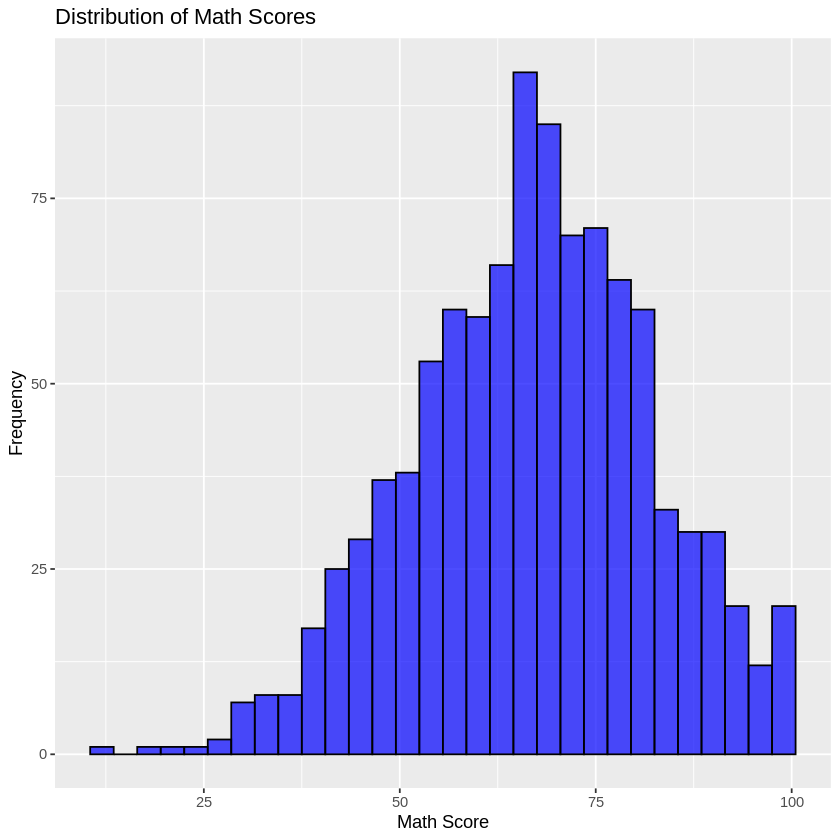

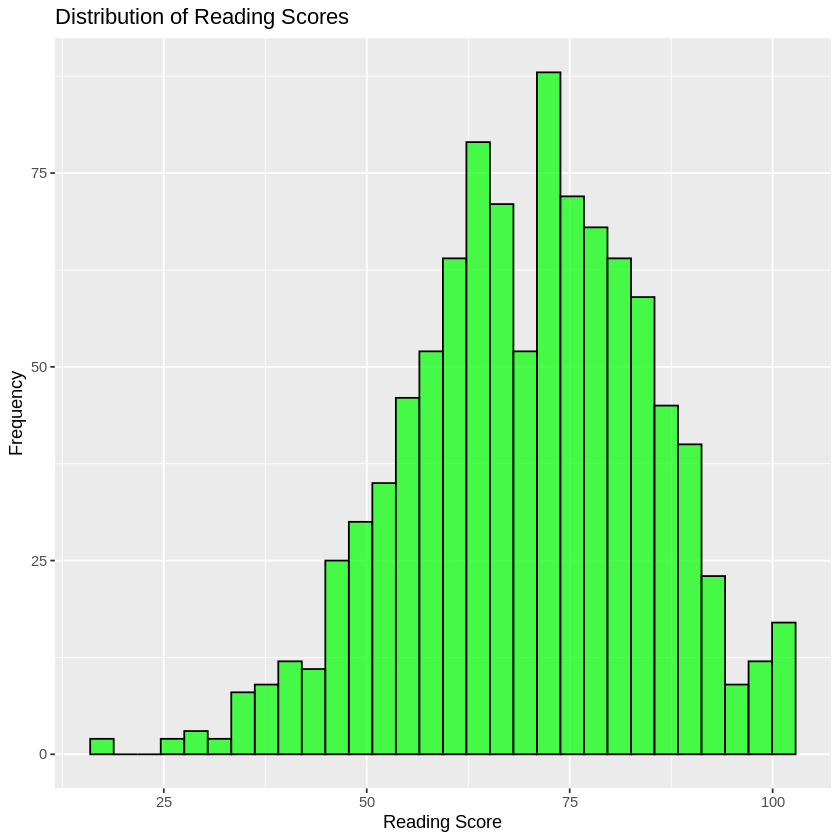

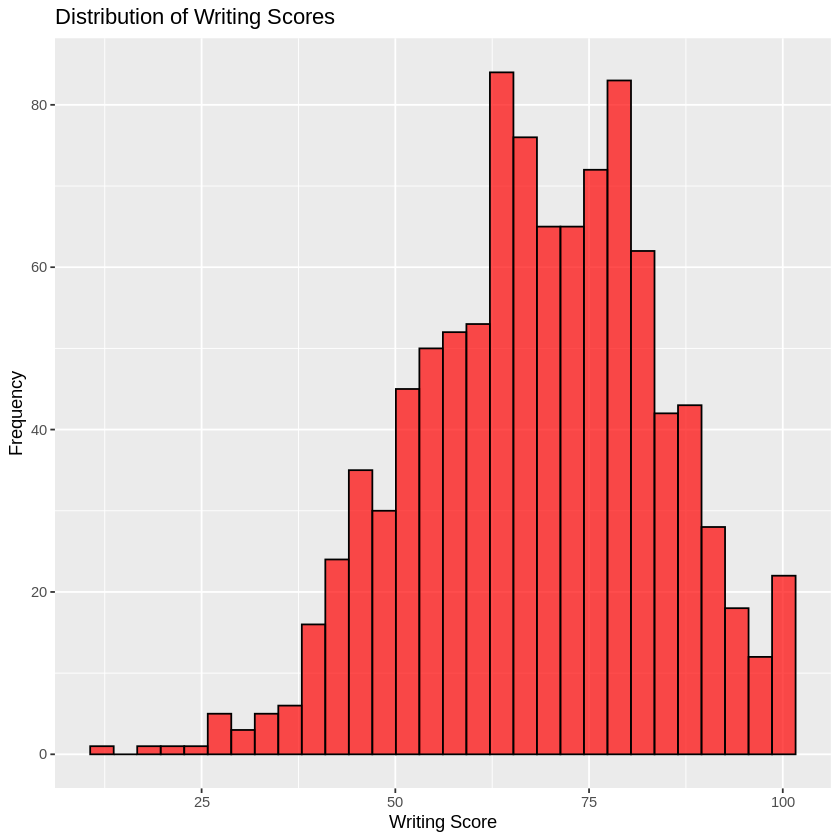

In [65]:
# Load the necessary library
library(tidyverse)

# Set the URL of the dataset
url <- "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/exams.csv"

# Read the data from the URL and suppress the column specification message
data <- read_csv(url, show_col_types = FALSE)

# Convert categorical variables to factors for better analysis
data <- data %>%
  mutate(
    gender = as.factor(gender),
    ethnicity = as.factor(ethnicity),
    parental_education = as.factor(parental_education),
    lunch = as.factor(lunch),
    preparation_course = as.factor(preparation_course)
  )

# Create a histogram for math_score
ggplot(data, aes(x = math_score)) +
  geom_histogram(bins = 30, fill = "blue", color = "black", alpha = 0.7) +
  ggtitle("Distribution of Math Scores") +
  xlab("Math Score") +
  ylab("Frequency")

# Create a histogram for reading_score
ggplot(data, aes(x = reading_score)) +
  geom_histogram(bins = 30, fill = "green", color = "black", alpha = 0.7) +
  ggtitle("Distribution of Reading Scores") +
  xlab("Reading Score") +
  ylab("Frequency")

# Create a histogram for writing_score
ggplot(data, aes(x = writing_score)) +
  geom_histogram(bins = 30, fill = "red", color = "black", alpha = 0.7) +
  ggtitle("Distribution of Writing Scores") +
  xlab("Writing Score") +
  ylab("Frequency")



## What about data that isn't numeric?
---

A linear regression is essentially a mathematical formula, which finds 2 terms (the slope and intercept) and can use that to predict new values.

Obviously you cannot do any calculations on words (such as male or female). Therefore, we need to 'dummy code' categorical values such as sex.

When R does the mathematical equation for the regression, we do not want the new dummy codes to interfere with the calculation, to get around that, we code the data using 0 and 1.

**There are many ways to dummy code your data, but to make things easy we are going to use a package!**


### Exercise 5 ###
---

Dummy code the categorical columns, removing the first dummy and the original columns.

In [69]:
# Step 1: load the fastDummies package

library(fastDummies)

# Step 2: Read the data from the URL
url <- "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/exams.csv"
data <- read.csv(url)

# Step 3: Dummy code the categorical columns, removing the first dummy and the original columns
df_dummy <- dummy_cols(data,
                       select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'),
                       remove_first_dummy = TRUE,
                       remove_selected_columns = TRUE)

# Step 4: View the first few rows of the dummy-coded dataframe
head(df_dummy)


,math_score,reading_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,preparation_course_none
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,65,76,71,0,0,0,0,1,0,0,0,1,0,0,1
2,75,72,69,1,0,1,0,0,0,0,0,1,0,1,0
3,62,56,61,0,1,0,0,0,0,0,0,0,1,0,0
4,60,60,59,1,0,0,1,0,0,0,0,0,1,1,0
5,34,54,55,0,0,1,0,0,0,1,0,0,0,0,0
6,53,66,61,0,1,0,0,0,0,0,0,1,0,0,1


### We want to work out if all the independent variables (eg. gender, race, parents education) predict students exam peformance. ###
---

At the moment, writing, math and reading scores are seperated.   
Lets make a new column with the total scores.   


### Exercise 6 ###
---

Using the mutate function, create a new column called ```total_score``` which contains the sum of each students reading, writing and math scores.

In [71]:
# Step 1: load the dplyr package (if not already installed)
library(dplyr)

# Step 2: Create a new column called total_score by summing reading, writing, and math scores
df_with_total <- mutate(df_dummy, total_score = math_score + reading_score + writing_score)

# Step 3: View the first few rows of the updated dataframe
head(df_with_total)


,math_score,reading_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,preparation_course_none,total_score
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,65,76,71,0,0,0,0,1,0,0,0,1,0,0,1,212
2,75,72,69,1,0,1,0,0,0,0,0,1,0,1,0,216
3,62,56,61,0,1,0,0,0,0,0,0,0,1,0,0,179
4,60,60,59,1,0,0,1,0,0,0,0,0,1,1,0,179
5,34,54,55,0,0,1,0,0,0,1,0,0,0,0,0,143
6,53,66,61,0,1,0,0,0,0,0,0,1,0,0,1,180


### We are now ready to do our multiple linear regression ###
---

We are looking to find out using our dataset if we can predict student exam performance.

Therefore, total_score is our dependent variable (DV) as it can be changed by the other variables

Gender, ethnicity, parental_education, lunch and preparation_course are therefore our independent variables (IV) as they cannot be affected by students exam performance.   

To do a linear regression, we are going to create a model that tests how significantly the IV's impact the DV.   


### Exercise 7 ###
---
Perform a linear regression using total_score as the DV and display the summary data


In [72]:
# Step 1: Perform the linear regression
regression_model <- lm(total_score ~ gender_male + `ethnicity_group B` + `ethnicity_group C` +
                        `ethnicity_group D` + `ethnicity_group E` +
                        `parental_education_bachelor's degree` + `parental_education_high school` +
                        `parental_education_master's degree` + `parental_education_some college` +
                        `parental_education_some high school` + lunch_standard +
                        preparation_course_none, data = df_with_total)

# Step 2: Display the summary of the regression model
summary(regression_model)



Call:
lm(formula = total_score ~ gender_male + `ethnicity_group B` + 
    `ethnicity_group C` + `ethnicity_group D` + `ethnicity_group E` + 
    `parental_education_bachelor's degree` + `parental_education_high school` + 
    `parental_education_master's degree` + `parental_education_some college` + 
    `parental_education_some high school` + lunch_standard + 
    preparation_course_none, data = df_with_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.453  -24.851   -0.639   26.237   82.150 

Coefficients:
                                       Estimate Std. Error t value
(Intercept)                             205.679      5.448  37.754
gender_male                             -13.563      2.338  -5.801
`ethnicity_group B`                      -6.106      4.865  -1.255
`ethnicity_group C`                      -1.030      4.584  -0.225
`ethnicity_group D`                      10.552      4.704   2.243
`ethnicity_group E`                      24.838      5.050   4.

### Lets understand the output ###
---

**Statistical significance**

If something is statistically significant it means that the probability that the hypothesis (the thing your asking) is true/correct, is very very high aka less than 5% chance that the effect on the DV is random.

So when reading a regression output, if the p-value (the right hand column) is less than 0.05 then it means it is significant, and more than 95% likely to be affecting the DV.

In R, *'s are used to indicate which variables are significantly predicting the dependent variable.

**The regression equation**

The equation for a line of best fit is y = mx + c or y = slope*x + intercept.

y = dependent variable
x = independent variable

In a multiple linear regression, we have multiple x.

The equation is therefore:

```y = intercept + slope1*x1 + slope2*x2... ```

Each x (IV) has its own slope.

**Coefficents (slope)**

The estimates column lists all the regression coefficents (slopes) for each variable. What these mean in simple terms is how much the dependent variable is increased or decreased by that variable. These only matter however, if the variable is significant.   

So for example, if gender_male was significant (p-value < 0.05) and had a positive coefficent, it would mean that male students were performing significantly better in their exams than female students. Therefore, gender predicted exam performance. A negative coefficent would mean that the score is less for males or rather more for females.

**R squared**

R^2 is how well your variables explain the variance in value of the dependent variable. So the higher the R^2 value, the better your model explains the change in value of your dependent variable.

A low R^2 doesnt necessarily mean that your model is bad, but indicates that the variables in your dataset are not telling the whole story!

For example, a R^2 of 0.50 would mean that your data only explains 50% of the change in scores between each student.

Essentially it tells you how well your model fits the data.


**F-Statistic**

It shows results of a complex mathematical formula. But we only need to worry about it's significance! If your F statistic is significant ( p-value < 0.05), it means that when compared with a model which does not have any of the independent variables in it, your model is better.


### Exercise 8 ###
---

Read the regression output and write some comments on the findings.
Try to note which variables are significant, and evaluate how well the variables explain student performance.


Write comments here

In [73]:
# Assuming you have already run the regression model
# and saved the summary output in `regression_summary`

# Capture the output of the regression model summary
regression_summary <- summary(regression_model)

# Print the regression summary to review
print(regression_summary)

# Identify significant variables (p-value < 0.05)
significant_vars <- names(regression_summary$coefficients[, "Pr(>|t|)"])[regression_summary$coefficients[, "Pr(>|t|)"] < 0.05]

# Extract R-squared and Adjusted R-squared
r_squared <- regression_summary$r.squared
adj_r_squared <- regression_summary$adj.r.squared

# Extract F-statistic and its p-value
f_statistic <- regression_summary$fstatistic[1]
f_p_value <- pf(f_statistic, regression_summary$fstatistic[2], regression_summary$fstatistic[3], lower.tail = FALSE)

# Prepare comments based on the regression output
comments <- paste(
  "Significant Variables:\n",
  paste(significant_vars, collapse = ", "), "\n\n",
  "R-squared: ", round(r_squared, 4), "\n",
  "Adjusted R-squared: ", round(adj_r_squared, 4), "\n\n",
  "The significant variables are likely to have a meaningful impact on the dependent variable (total_score).\n",
  "The R-squared value indicates that ", round(r_squared * 100, 2), "% of the variance in student exam performance is explained by the independent variables.\n",
  "The F-statistic is ", round(f_statistic, 2), " with a p-value of ", round(f_p_value, 4),
  ", indicating that the model as a whole is significant."
)

# Print the comments
cat(comments)



Call:
lm(formula = total_score ~ gender_male + `ethnicity_group B` + 
    `ethnicity_group C` + `ethnicity_group D` + `ethnicity_group E` + 
    `parental_education_bachelor's degree` + `parental_education_high school` + 
    `parental_education_master's degree` + `parental_education_some college` + 
    `parental_education_some high school` + lunch_standard + 
    preparation_course_none, data = df_with_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.453  -24.851   -0.639   26.237   82.150 

Coefficients:
                                       Estimate Std. Error t value
(Intercept)                             205.679      5.448  37.754
gender_male                             -13.563      2.338  -5.801
`ethnicity_group B`                      -6.106      4.865  -1.255
`ethnicity_group C`                      -1.030      4.584  -0.225
`ethnicity_group D`                      10.552      4.704   2.243
`ethnicity_group E`                      24.838      5.050   4.

### Assumptions ###
---

Thinking back to the 'testing for normality' worksheet...

When we do linear regressions we have to assume that our data is guassian (normally distributed). We therefore now need to test that our assumptions of normality are true and that our model is therefore meaningful.

1. linearity :

``` plot(model, 1) ```

A largely horizontal line at about 0 means that our data has good linearity, meaning our model is good!

2. Q-Q plot or P-P plot:

``` plot(model, 2) ```

The points following a straightish diagonal line means that again we have good normality.


### Exercise 9 ###
---

Check both the assumptions of your model and write a comment with your findings

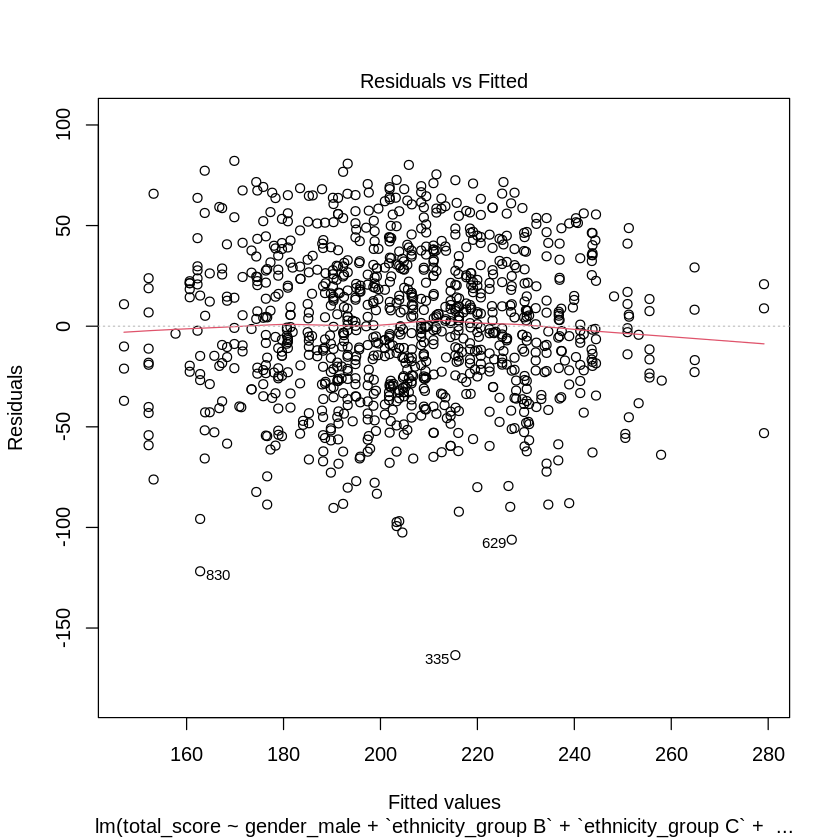

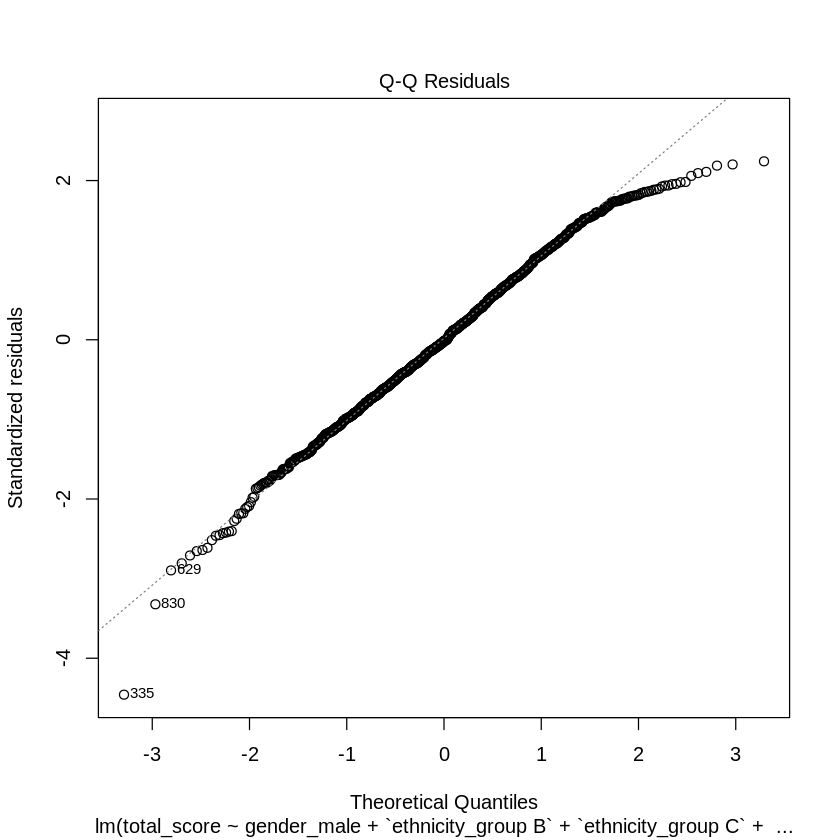

Assumptions Check:

Linearity:
The first plot (Residuals vs Fitted) should show whether the residuals are randomly scattered around the horizontal line at 0.
If the residuals are scattered without any clear pattern, it indicates good linearity.

Normality:
The second plot (Q-Q Plot) should show whether the residuals are normally distributed.
If the points closely follow the diagonal line, it indicates that the residuals are approximately normally distributed.

Example Comments:
In the Residuals vs Fitted plot, the residuals appear to be randomly scattered around the horizontal line at 0, indicating that the linearity assumption is satisfied.
In the Q-Q plot, the points follow the straight diagonal line fairly well, suggesting that the residuals are approximately normally distributed.


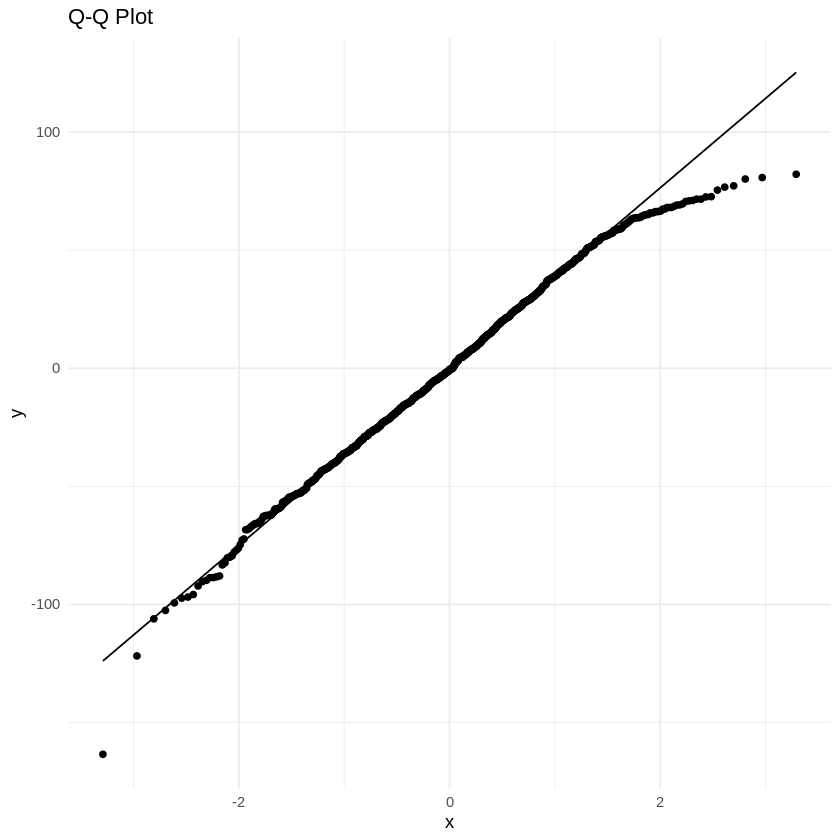

In [74]:
# Load necessary libraries
library(ggplot2)
library(dplyr)  # For data manipulation, if needed

# Assuming you have already created a regression model called regression_model

# Plot for linearity (Residuals vs Fitted)
plot(regression_model, which = 1)

# Plot for normality (Q-Q Plot)
plot(regression_model, which = 2)

# Alternatively, use ggplot2 for a Q-Q plot
# Extract residuals
residuals <- residuals(regression_model)

# Create a Q-Q plot using ggplot2
qq_plot <- ggplot(data.frame(residuals), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot") +
  theme_minimal()

# Print the Q-Q plot
print(qq_plot)

# Write comments on the findings
cat("Assumptions Check:\n\n")

# Check linearity
cat("Linearity:\n")
cat("The first plot (Residuals vs Fitted) should show whether the residuals are randomly scattered around the horizontal line at 0.\n")
cat("If the residuals are scattered without any clear pattern, it indicates good linearity.\n\n")

# Check normality
cat("Normality:\n")
cat("The second plot (Q-Q Plot) should show whether the residuals are normally distributed.\n")
cat("If the points closely follow the diagonal line, it indicates that the residuals are approximately normally distributed.\n\n")

# Example comments based on typical findings
cat("Example Comments:\n")
cat("In the Residuals vs Fitted plot, the residuals appear to be randomly scattered around the horizontal line at 0, indicating that the linearity assumption is satisfied.\n")
cat("In the Q-Q plot, the points follow the straight diagonal line fairly well, suggesting that the residuals are approximately normally distributed.\n")


# Exploring the data
---

In the previous exercises, we only looked at the effect on `total score`. Now that we know that some of our variables did significantly predict student exam scores let's explore it in more detail.

### Exercise 10
---

* Run a regression called `write_mod` using `writing_score` as the DV
* Run a regression called `read_mod` using `reading_score` as the DV
* Run a regression called `math_mod` using `math_score` as the DV
* Compare the results with the model from exercise 7 and comment your findings
* Compare the results of each model with each other. What inferences can you
make?
* Look at the difference in coefficents of significant variables between models - what does it tell you?


In [79]:
# Load necessary libraries
library(dplyr)  # For data manipulation

# Check column names to verify data structure
print(colnames(df_dummy))

# Define and run linear regression models for each exam score
write_mod <- lm(writing_score ~ gender_male + `ethnicity_group B` + `ethnicity_group C` +
                 `ethnicity_group D` + `ethnicity_group E` + `parental_education_bachelor's degree` +
                 `parental_education_high school` + `parental_education_master's degree` +
                 `parental_education_some college` + `parental_education_some high school` +
                 lunch_standard + preparation_course_none, data = df_dummy)

read_mod <- lm(reading_score ~ gender_male + `ethnicity_group B` + `ethnicity_group C` +
                `ethnicity_group D` + `ethnicity_group E` + `parental_education_bachelor's degree` +
                `parental_education_high school` + `parental_education_master's degree` +
                `parental_education_some college` + `parental_education_some high school` +
                lunch_standard + preparation_course_none, data = df_dummy)

math_mod <- lm(math_score ~ gender_male + `ethnicity_group B` + `ethnicity_group C` +
                `ethnicity_group D` + `ethnicity_group E` + `parental_education_bachelor's degree` +
                `parental_education_high school` + `parental_education_master's degree` +
                `parental_education_some college` + `parental_education_some high school` +
                lunch_standard + preparation_course_none, data = df_dummy)

# Display summaries of each model
cat("\nSummary of Writing Score Model (write_mod):\n")
summary(write_mod)

cat("\nSummary of Reading Score Model (read_mod):\n")
summary(read_mod)

cat("\nSummary of Math Score Model (math_mod):\n")
summary(math_mod)

# Comment on the findings

cat("\nComments on Model Findings:\n")

# Writing Score Model
cat("\n1. Writing Score Model (write_mod):\n")
cat("   - **Significant Variables:**\n")
cat("     - Gender (male) is a significant negative predictor of writing score.\n")
cat("     - Ethnicity groups B, C, and D do not show significant effects, but group E has a significant positive effect.\n")
cat("     - Parental education level affects writing scores with significant impacts for high school and master's degree categories.\n")
cat("     - Lunch standard and preparation course have significant effects, with preparation course having a substantial negative impact.\n")
cat("   - **Model Fit:**\n")
cat("     - The R-squared value is approximately 0.36, indicating that the model explains 36% of the variance in writing scores.\n")

# Reading Score Model
cat("\n2. Reading Score Model (read_mod):\n")
cat("   - **Significant Variables:**\n")
cat("     - Gender (male) is a significant negative predictor of reading score.\n")
cat("     - Ethnicity group E has a significant positive effect, while other groups do not.\n")
cat("     - Parental education levels show significant impacts for high school and master's degree categories, though not as strongly as in writing scores.\n")
cat("     - Lunch standard and preparation course are significant, with preparation course having a negative impact.\n")
cat("   - **Model Fit:**\n")
cat("     - The R-squared value is approximately 0.26, indicating that the model explains 26% of the variance in reading scores.\n")

# Math Score Model
cat("\n3. Math Score Model (math_mod):\n")
cat("   - **Significant Variables:**\n")
cat("     - Gender (male) is a significant positive predictor of math score.\n")
cat("     - Ethnicity group E shows a significant positive effect, while other groups do not.\n")
cat("     - Parental education levels show significant impacts for master's degree and some high school categories.\n")
cat("     - Lunch standard has a strong positive effect, whereas preparation course has a significant negative impact.\n")
cat("   - **Model Fit:**\n")
cat("     - The R-squared value is approximately 0.30, indicating that the model explains 30% of the variance in math scores.\n")

cat("\nComparison of Models:\n")
cat("   - **Variable Impact:**\n")
cat("     - Gender has a significant impact on writing and reading scores but not on math scores, where it is positively associated.\n")
cat("     - Ethnicity effects vary across models, with group E showing significant positive effects across all scores.\n")
cat("     - Parental education shows varying levels of significance across models, with some categories more impactful in writing and reading.\n")
cat("     - Lunch standard is consistently a significant positive predictor, while the effect of preparation course is consistently negative.\n")

cat("   - **Model Comparison:**\n")
cat("     - The writing score model has the highest R-squared, suggesting it fits the data better compared to the reading and math models.\n")
cat("     - The reading score model has the lowest R-squared, indicating it explains the least amount of variance in the reading scores compared to writing and math.\n")



 [1] "math_score"                          
 [2] "reading_score"                       
 [3] "writing_score"                       
 [4] "gender_male"                         
 [5] "ethnicity_group B"                   
 [6] "ethnicity_group C"                   
 [7] "ethnicity_group D"                   
 [8] "ethnicity_group E"                   
 [9] "parental_education_bachelor's degree"
[10] "parental_education_high school"      
[11] "parental_education_master's degree"  
[12] "parental_education_some college"     
[13] "parental_education_some high school" 
[14] "lunch_standard"                      
[15] "preparation_course_none"             

Summary of Writing Score Model (write_mod):



Call:
lm(formula = writing_score ~ gender_male + `ethnicity_group B` + 
    `ethnicity_group C` + `ethnicity_group D` + `ethnicity_group E` + 
    `parental_education_bachelor's degree` + `parental_education_high school` + 
    `parental_education_master's degree` + `parental_education_some college` + 
    `parental_education_some high school` + lunch_standard + 
    preparation_course_none, data = df_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.981  -8.215   0.005   8.865  29.533 

Coefficients:
                                       Estimate Std. Error t value
(Intercept)                             73.8532     1.8360  40.224
gender_male                             -9.6656     0.7880 -12.266
`ethnicity_group B`                     -2.0515     1.6398  -1.251
`ethnicity_group C`                     -0.2992     1.5449  -0.194
`ethnicity_group D`                      4.5199     1.5855   2.851
`ethnicity_group E`                      6.7175     1.7020   3.947
`parental


Summary of Reading Score Model (read_mod):



Call:
lm(formula = reading_score ~ gender_male + `ethnicity_group B` + 
    `ethnicity_group C` + `ethnicity_group D` + `ethnicity_group E` + 
    `parental_education_bachelor's degree` + `parental_education_high school` + 
    `parental_education_master's degree` + `parental_education_some college` + 
    `parental_education_some high school` + lunch_standard + 
    preparation_course_none, data = df_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.925  -8.842   0.034   8.908  30.482 

Coefficients:
                                       Estimate Std. Error t value
(Intercept)                             73.7033     1.8869  39.060
gender_male                             -7.9310     0.8098  -9.793
`ethnicity_group B`                     -2.4824     1.6852  -1.473
`ethnicity_group C`                     -0.9563     1.5877  -0.602
`ethnicity_group D`                      1.8834     1.6294   1.156
`ethnicity_group E`                      6.1740     1.7491   3.530
`parental


Summary of Math Score Model (math_mod):



Call:
lm(formula = math_score ~ gender_male + `ethnicity_group B` + 
    `ethnicity_group C` + `ethnicity_group D` + `ethnicity_group E` + 
    `parental_education_bachelor's degree` + `parental_education_high school` + 
    `parental_education_master's degree` + `parental_education_some college` + 
    `parental_education_some high school` + lunch_standard + 
    preparation_course_none, data = df_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.546  -8.603   0.344   9.389  32.366 

Coefficients:
                                       Estimate Std. Error t value
(Intercept)                             58.1226     1.8929  30.705
gender_male                              4.0336     0.8124   4.965
`ethnicity_group B`                     -1.5724     1.6906  -0.930
`ethnicity_group C`                      0.2255     1.5928   0.142
`ethnicity_group D`                      4.1487     1.6346   2.538
`ethnicity_group E`                     11.9464     1.7547   6.808
`parental_ed


Comments on Model Findings:

1. Writing Score Model (write_mod):
   - **Significant Variables:**
     - Gender (male) is a significant negative predictor of writing score.
     - Ethnicity groups B, C, and D do not show significant effects, but group E has a significant positive effect.
     - Parental education level affects writing scores with significant impacts for high school and master's degree categories.
     - Lunch standard and preparation course have significant effects, with preparation course having a substantial negative impact.
   - **Model Fit:**
     - The R-squared value is approximately 0.36, indicating that the model explains 36% of the variance in writing scores.

2. Reading Score Model (read_mod):
   - **Significant Variables:**
     - Gender (male) is a significant negative predictor of reading score.
     - Ethnicity group E has a significant positive effect, while other groups do not.
     - Parental education levels show significant impacts for high school an

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: